<a href="https://colab.research.google.com/github/mantovan1/fractals/blob/main/bcen_fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import io

from google.colab import files

In [14]:
link_1 = 'https://drive.google.com/file/d/1Ye-Q-JLXqg-Wgg04pOin7Y_I9otZfMnf/view?usp=drive_link'
link_2 = 'https://drive.google.com/file/d/1FpGFBoP_v8A6TbHS35b1NQIGeyHFUUYb/view?usp=drive_link'

link_1 = 'https://drive.google.com/uc?id=1Ye-Q-JLXqg-Wgg04pOin7Y_I9otZfMnf&export=download'
link_2 = 'https://drive.google.com/uc?id=1FpGFBoP_v8A6TbHS35b1NQIGeyHFUUYb&export=download'

# Read the CSV files into Pandas DataFrames
aluminium_data = pd.read_csv(link_1)
paper_data = pd.read_csv(link_2)

In [16]:
#papel normal
paper_mass = np.array(paper_data["massa"])
paper_diameter_paquimeter = np.array(paper_data["diametro-paquimetro"])
paper_diameter_ruler = np.array(paper_data["diametro-regua"])

#aluminio
aluminium_mass = np.array(aluminium_data["massa"])
aluminium_diameter_paquimeter = np.array(aluminium_data["diametro-paquimetro"])
aluminium_diameter_ruler = np.array(aluminium_data["diametro-regua"])

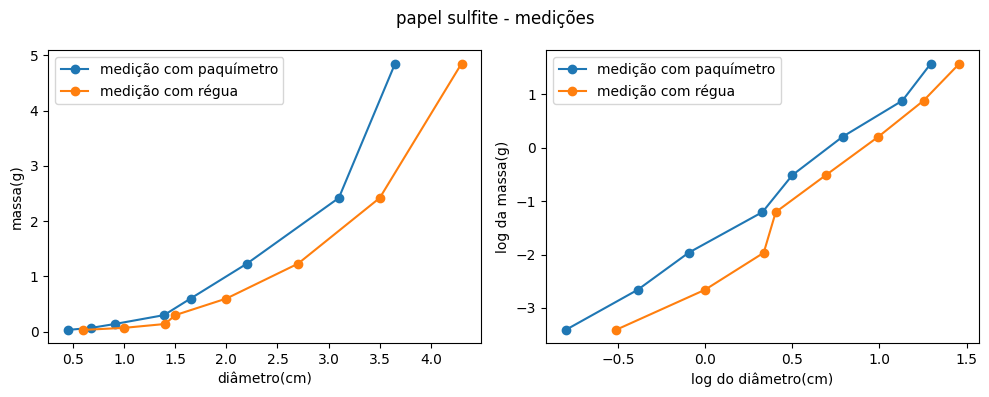

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle('papel sulfite - medições', ha='center')

ax1.plot(paper_diameter_paquimeter, paper_mass, 'o-', label="medição com paquímetro")
ax1.plot(paper_diameter_ruler, paper_mass, 'o-', label="medição com régua")
ax1.set_xlabel("diâmetro(cm)")
ax1.set_ylabel("massa(g)")
ax1.legend()

ax2.plot([math.log(y) for y in paper_diameter_paquimeter], [math.log(x) for x in paper_mass], 'o-', label="medição com paquímetro")
ax2.plot([math.log(y) for y in paper_diameter_ruler], [math.log(x) for x in paper_mass], 'o-', label="medição com régua")
ax2.set_xlabel("log do diâmetro(cm)")
ax2.set_ylabel("log da massa(g)")
ax2.legend()

plt.tight_layout()

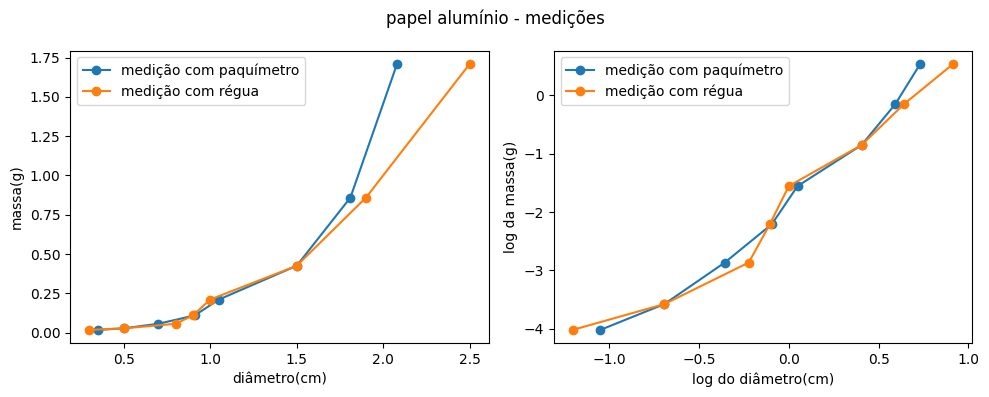

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle('papel alumínio - medições', ha='center')

ax1.plot(aluminium_diameter_paquimeter, aluminium_mass, 'o-', label="medição com paquímetro")
ax1.plot(aluminium_diameter_ruler, aluminium_mass, 'o-', label="medição com régua")
ax1.set_xlabel("diâmetro(cm)")
ax1.set_ylabel("massa(g)")
ax1.legend()

ax2.plot([math.log(x) for x in aluminium_diameter_paquimeter], [math.log(y) for y in aluminium_mass], 'o-', label="medição com paquímetro")
ax2.plot([math.log(x) for x in aluminium_diameter_ruler], [math.log(y) for y in aluminium_mass], 'o-', label="medição com régua")
ax2.set_xlabel("log do diâmetro(cm)")
ax2.set_ylabel("log da massa(g)")
ax2.legend()

plt.tight_layout()

In [19]:
df_paper_logs = pd.DataFrame({"log-diametro-paquimetro": np.array([math.log(x) for x in paper_diameter_paquimeter]), "log-diametro-regua": np.array([math.log(x) for x in paper_diameter_ruler]), "log-massa": np.array([math.log(y) for y in paper_mass])})
df_paper_logs

,log-diametro-paquimetro,log-diametro-regua,log-massa
0,1.294727,1.458615,1.578979
1,1.131402,1.252763,0.883768
2,0.788457,0.993252,0.207014
3,0.500775,0.693147,-0.510826
4,0.329304,0.405465,-1.203973
5,-0.094311,0.336472,-1.966113
6,-0.385662,0.000000,-2.659260
7,-0.798508,-0.510826,-3.411248


In [20]:
df_aluminium_logs = pd.DataFrame({"log-diametro-paquimetro": np.array([math.log(x) for x in aluminium_diameter_paquimeter]), "log-diametro-regua": np.array([math.log(x) for x in aluminium_diameter_ruler]), "log-massa": np.array([math.log(y) for y in aluminium_mass])})
df_aluminium_logs

,log-diametro-paquimetro,log-diametro-regua,log-massa
0,0.732368,0.916291,0.536493
1,0.593327,0.641854,-0.151986
2,0.405465,0.405465,-0.853316
3,0.048790,0.000000,-1.555897
4,-0.094311,-0.105361,-2.207275
5,-0.356675,-0.223144,-2.864704
6,-0.693147,-0.693147,-3.575551
7,-1.049822,-1.203973,-4.017384


In [21]:
def f(coef_angular, coef_linear, x):
  return coef_angular * x + coef_linear

Text(0.5, 0.98, 'papel sulfite - resultados finais')

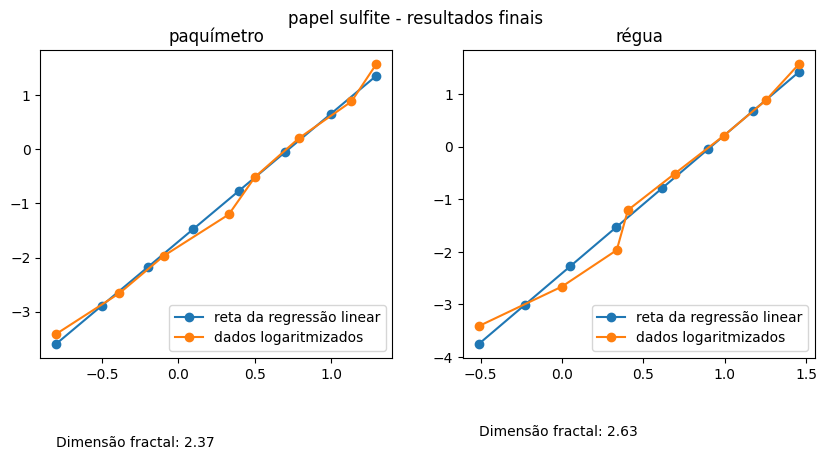

In [22]:
paper_diameter_paquimeter_logs = np.array([math.log(x) for x in paper_diameter_paquimeter])
paper_diameter_ruler_logs = np.array([math.log(x) for x in paper_diameter_ruler])
paper_mass_logs = np.array([math.log(x) for x in paper_mass])

#preparando dados da amostra medida por paquímetro
regressor1 = LinearRegression()
regressor1.fit(paper_diameter_paquimeter_logs.reshape(-1, 1), paper_mass_logs)

coef_angular1 = regressor1.coef_[0]
coef_linear1 = regressor1.intercept_

x1 = np.linspace(paper_diameter_paquimeter_logs[0], paper_diameter_paquimeter_logs[-1], 8)
y1 = [f(coef_angular1, coef_linear1, x) for x in x1]

#preparando dados da amostra medida por régua

regressor2 = LinearRegression()
regressor2.fit(paper_diameter_ruler_logs.reshape(-1, 1), paper_mass_logs)

coef_angular2 = regressor2.coef_[0]
coef_linear2 = regressor2.intercept_

x2 = np.linspace(paper_diameter_ruler_logs[0], paper_diameter_ruler_logs[-1], 8)
y2 = [f(coef_angular2, coef_linear2, x) for x in x2]

#plotando as informações finais

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(x1, y1, 'o-', label='reta da regressão linear')
ax1.set_title("paquímetro")
ax1.plot(paper_diameter_paquimeter_logs, paper_mass_logs, 'o-', label='dados logaritmizados')
ax1.legend(loc='lower right')
ax1.text(paper_diameter_paquimeter_logs[-1], -5.5, f'Dimensão fractal: {coef_angular1:.2f}')

ax2.plot(x2, y2, 'o-', label='reta da regressão linear')
ax2.set_title("régua")
ax2.plot(paper_diameter_ruler_logs, paper_mass_logs, 'o-', label='dados logaritmizados')
ax2.legend(loc='lower right')
ax2.text(paper_diameter_ruler_logs[-1], -5.5, f'Dimensão fractal: {coef_angular2:.2f}')

plt.suptitle('papel sulfite - resultados finais', ha='center')

Text(0.5, 0.98, 'papel alumínio - resultados finais')

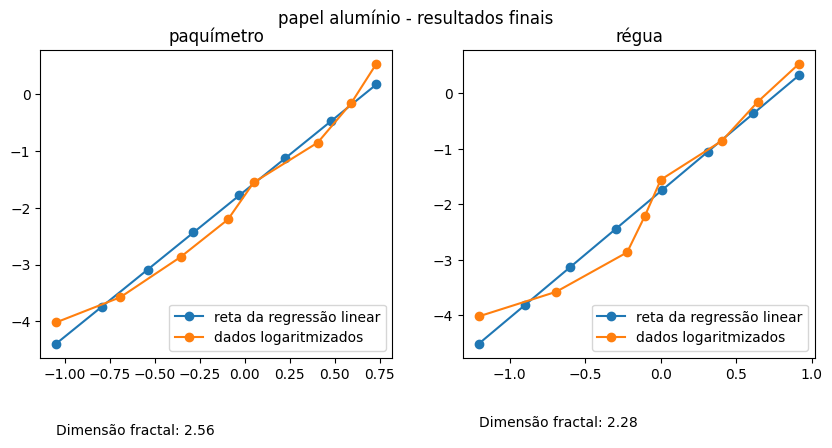

In [23]:
aluminium_diameter_paquimeter_logs = np.array([math.log(x) for x in aluminium_diameter_paquimeter])
aluminium_diameter_ruler_logs = np.array([math.log(x) for x in aluminium_diameter_ruler])
aluminium_mass_logs = np.array([math.log(x) for x in aluminium_mass])

#preparando dados da amostra medida por paquímetro
regressor1 = LinearRegression()
regressor1.fit(aluminium_diameter_paquimeter_logs.reshape(-1, 1), aluminium_mass_logs)

coef_angular1 = regressor1.coef_[0]
coef_linear1 = regressor1.intercept_

x1 = np.linspace(aluminium_diameter_paquimeter_logs[0], aluminium_diameter_paquimeter_logs[-1], 8)
y1 = [f(coef_angular1, coef_linear1, x) for x in x1]

#preparando dados da amostra medida por régua

regressor2 = LinearRegression()
regressor2.fit(aluminium_diameter_ruler_logs.reshape(-1, 1), aluminium_mass_logs)

coef_angular2 = regressor2.coef_[0]
coef_linear2 = regressor2.intercept_

x2 = np.linspace(aluminium_diameter_ruler_logs[0], aluminium_diameter_ruler_logs[-1], 8)
y2 = [f(coef_angular2, coef_linear2, x) for x in x2]

#plotando as informações finais

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(x1, y1, 'o-', label='reta da regressão linear')
ax1.set_title("paquímetro")
ax1.plot(aluminium_diameter_paquimeter_logs, aluminium_mass_logs, 'o-', label='dados logaritmizados')
ax1.legend(loc='lower right')

ax2.plot(x2, y2, 'o-', label='reta da regressão linear')
ax2.set_title("régua")
ax2.plot(aluminium_diameter_ruler_logs, aluminium_mass_logs, 'o-', label='dados logaritmizados')
ax2.legend(loc='lower right')

ax1.text(aluminium_diameter_paquimeter_logs[-1], -6, f'Dimensão fractal: {coef_angular1:.2f}')
ax2.text(aluminium_diameter_ruler_logs[-1], -6, f'Dimensão fractal: {coef_angular2:.2f}')

plt.suptitle('papel alumínio - resultados finais', ha='center')